# Kiva Loan Challenge

The objective of the analysis below is t explore the dataset to gain in_dept knowledge on the characteristic 
of borrowers and understand their poverty level.


In [1]:
#load packages
import numpy as np
import pandas as pd


Load data and view the first and the last 5 rows

In [2]:
#import data
kiva_loans = pd.read_csv("F:\\BOOKS\\PythonCohort1\\KivaData\\kiva_loans.csv")
#print(kiva_loans)
print(kiva_loans.head())
print(kiva_loans.tail())

       id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                post

 Missing data

In [3]:
#Handling NullValues
#how many null values per column
print(kiva_loans.isnull().sum())

#drop na and get the dim of new data sets
nakiva_loan = kiva_loans.dropna()
print(nakiva_loan.shape)

#Replace missing Values
kiva_loans[kiva_loans.notnull()].shape

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64
(423081, 20)


(671205, 20)

In [ ]:
The above table shows the total number of missing values in each column

Dropping all rows with missing data will lead to lossing a total of 68142 row
which is a suficient amount of data. Filling this values will lead to getting misleading info
therefore we are going to use the available date


In [4]:
#A brief description of our data
print(kiva_loans.describe())

print(kiva_loans.corr())

                 id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000  
                      id  funded_amo

The first tables shows how our data is distributed
-The mean of The amount that Kiva has given is $ 785.995061 with a standard deviatioon of 1130.398941
-The min and max amount loan amount given is respectively $25, $100000
-the max and minimun period in months that the borrowers were given to repay is 158 and on month respectively

The second table shows the relationship of some of our variables
If the value say r is close to 0 means ther is no relationship between variables. If r is positive it means that 
as ove variable gets larger the other het larger as well. If negative it means that as one gets larger the other gets smaller




In [5]:
##Analysis
#country
# Create a per_country pivot table
loans_country = pd.pivot_table(kiva_loans, index=['country'], values=['loan_amount', 'funded_amount'], aggfunc=sum)
#print(loans_country)
loans_country1 = loans_country.sort_values(by=['funded_amount'],ascending=False)
print(loans_country1.head(10))
print(loans_country1.tail(10))

               funded_amount  loan_amount
country                                  
Philippines       54476375.0   55342225.0
Kenya             32248405.0   34534300.0
Peru              30394850.0   30867400.0
Paraguay          29412700.0   29629075.0
El Salvador       23357725.0   26603650.0
United States     23158540.0   31496375.0
Cambodia          18817100.0   19872700.0
Bolivia           18276200.0   19843250.0
Rwanda            15505600.0   16646300.0
Ecuador           14598900.0   15000275.0
                                  funded_amount  loan_amount
country                                                     
Chile                                   76250.0     122650.0
Cote D'Ivoire                           50000.0      50000.0
Saint Vincent and the Grenadines        49225.0      49225.0
Namibia                                 32375.0      32375.0
Bhutan                                  15625.0      20000.0
Mauritania                              15000.0      15000.0
Afghanis

The above tables shows the total amount funded and given to the borrowers, in order of the countries that was given more money to the country that was given the least.
Philippines and Kenya leads from the top while Guam and Virgin Islands got the least.

In [6]:
#country, amount, sector
loans_repayment_interval = kiva_loans[['country','repayment_interval' ]]
Country = pd.pivot_table(kiva_loans, index=['country'], columns=['repayment_interval'], values= ['term_in_months'], aggfunc='count')
#values=['term_in_months' ],
print(Country.head(10))



                   term_in_months                         
repayment_interval         bullet irregular monthly weekly
country                                                   
Afghanistan                   2.0       NaN     NaN    NaN
Albania                      23.0      26.0  1885.0    NaN
Armenia                      43.0     170.0  8418.0    NaN
Azerbaijan                    NaN      12.0  1933.0    NaN
Belize                        NaN       NaN   125.0    NaN
Benin                         1.0      40.0   456.0    NaN
Bhutan                        NaN       2.0     NaN    NaN
Bolivia                      39.0    1231.0  7536.0    NaN
Brazil                       14.0     181.0    89.0    NaN
Burkina Faso                184.0    1396.0   880.0    NaN


In [ ]:
In the table above shows the average of time in month given countries are expected to repay their loans


In [7]:
#Sector
sector = kiva_loans.groupby('sector')[['id']].count()
#Agricuture and food has the highest borrower
#wholesale and Entertainment has the least
print(sector.sort_values(by=['id'], ascending=False))


                    id
sector                
Agriculture     180302
Food            136657
Retail          124494
Services         45140
Personal Use     36385
Housing          33731
Clothing         32742
Education        31013
Transportation   15518
Arts             12060
Health            9223
Construction      6268
Manufacturing     6208
Entertainment      830
Wholesale          634


In [8]:
loan_activity= Python4ds_cohort-1
print(loan_activity.head(10))
print(loan_activity.tail(10))
loan_activity.shape

                     id
activity               
Adult Care            2
Agriculture       27023
Air Conditioning     36
Animal Sales       9237
Aquaculture         108
Arts               1092
Auto Repair        1336
Bakery             3620
Balut-Making         61
Barber Shop         951
                      id
activity                
Utilities            185
Vehicle             1257
Vehicle Repairs      615
Veterinary Sales     198
Waste Management     308
Water Distribution   564
Weaving             2961
Wedding Expenses     405
Well digging          42
Wholesale            357


(163, 1)

In [ ]:
The above table groups our data into sectors and activities, 
It shows the frequecy at which each groups in this categories asks for loans
Agriculture sector and the Wholesale being the highest and the least respectively.

with a total of 163 activities Wedding Expenses, Well diggiing and weaving rarely borrows,
Adult care, agreculture and Air conditioning tops on borrowing
#

In [10]:
#A pivot table of Loan amount and funded amount
sectorLoans = kiva_loans.groupby('sector')[['loan_amount', 'funded_amount']].sum()
sectorLoans.sort_values(by=['loan_amount'])

,loan_amount,funded_amount
sector,,
Wholesale,995200.0,918900.0
Entertainment,1389150.0,1023095.0
Manufacturing,5447900.0,5356650.0
Construction,6695150.0,6321515.0
Health,9843400.0,9172250.0
Transportation,11066900.0,9842500.0
Arts,12240325.0,11821055.0
Personal Use,14955350.0,14189775.0
Housing,23663950.0,21377100.0


In [11]:
# group by average time  in months by sector and repayment intervals 
pd.pivot_table(kiva_loans, index=['sector'], columns=['repayment_interval'], values=['term_in_months' ], aggfunc=[np.mean])

mean                                
                   term_in_months                                
repayment_interval         bullet  irregular    monthly    weekly
sector                                                           
Agriculture             15.112163  11.156679  15.655357  3.410256
Arts                    18.062373   9.724978  14.943377  4.200000
Clothing                22.337786   8.761561  14.056343  4.898551
Construction            26.857143  10.428018  16.367694  4.272727
Education               24.677472  29.778672  19.873602       NaN
Entertainment           22.535484  10.566372  18.530067       NaN
Food                    21.767311   9.299602  13.925820  4.329897
Health                  22.355072  23.166365  18.242682  6.307692
Housing                 38.884091  24.035025  18.644262       NaN
Manufacturing           27.946785   9.522755  15.898433       NaN
Personal Use            14.268837  20.658339  12.202174       NaN
Retail                  18.487854   8.884366  13.788398  4.185484
Services                20.607515   9.663958  16.246161  4.006536
Transportation          28.131707   9.830757  15.380624  4.166667
Wholesale               19.928571   9.780488  15.966184       NaN

C:\Users\margaretm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


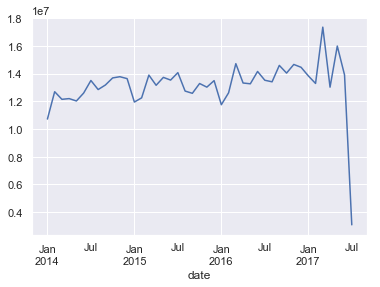

In [12]:
##A trend visualization of Amount borrowed since 2014 to 2017
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
Date_Amount = kiva_loans[["date","loan_amount"]]
Date_Amount['date'] = pd.to_datetime(Date_Amount['date'])
Date_Amount.index = Date_Amount['date']
Date_Amount.head()
df = Date_Amount['loan_amount']
newdf = df.resample('M').sum()
newdf.plot()